In [11]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [12]:
df = pd.read_csv('data/smalltrain.csv')
df.set_index('fname', inplace=True)
df

,label
fname,
00009_1.wav,glass
00009_2.wav,glass
00009_3.wav,glass
00009_4.wav,glass
00009_5.wav,glass
00009_6.wav,glass
00053_1.wav,glass
00053_2.wav,glass
00053_3.wav,glass


In [13]:
for f in df.index:
    rate, signal = wavfile.read('/Users/ameeshas11/Documents/AudioClassification/Dataset/Training/sounds/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

In [14]:
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

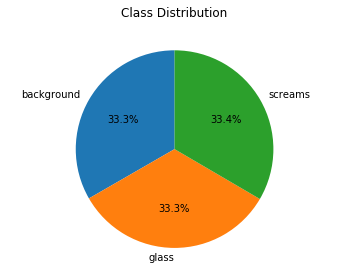

In [15]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle = 90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [16]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for y in range(3):
        data = list(fft.values())[i]
        Y, freq = data[0], data[1]
        axes[y].set_title(list(fft.keys())[i])
        axes[y].plot(freq, Y)
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1
            

In [17]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True,
                             sharey=False, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    #for x in range(2):
    for y in range(3):
        axes[y].set_title(list(signals.keys())[i])
        axes[y].plot(list(signals.values())[i])
        axes[y].get_xaxis().set_visible(True)
        axes[y].get_yaxis().set_visible(True)
        i += 1

In [18]:
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for y in range(3):
        axes[y].set_title(list(fbank.keys())[i])
        axes[y].imshow(list(fbank.values())[i],
                cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1



In [19]:
def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for y in range(3):
        axes[y].set_title(list(mfccs.keys())[i])
        axes[y].imshow(list(mfccs.values())[i],
                cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1



In [20]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1,center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [21]:
def calc_fft(y,rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return(Y, freq)	

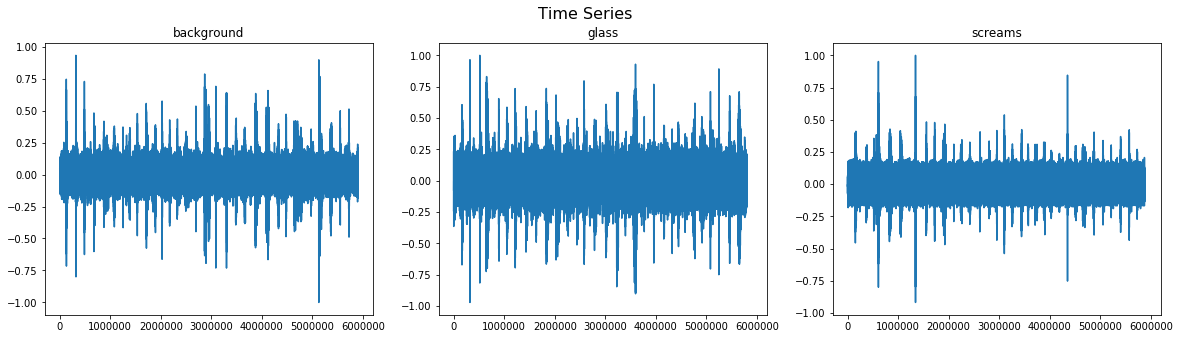

In [22]:
signals1 = {}
fft1 = {}
fbank1 = {}
mfccs1 = {}

for c in classes: 
    wav_file1 = df[df.label==c].iloc[0,0]
    signal1, rate1 = librosa.load('Dataset/Training/sounds/'+wav_file1, sr=32000)
    signals1[c] = signal1
    fft1[c] = calc_fft(signal1, rate1)

    bank1 = logfbank(signal1[:rate1], rate1, nfilt=26, nfft=800).T
    fbank1[c] = bank1
    mel1 = mfcc(signal1[:rate1], rate1, numcep=13, nfilt=26, nfft=800).T
    mfccs1[c] = mel1
plot_signals(signals1)
plt.show()

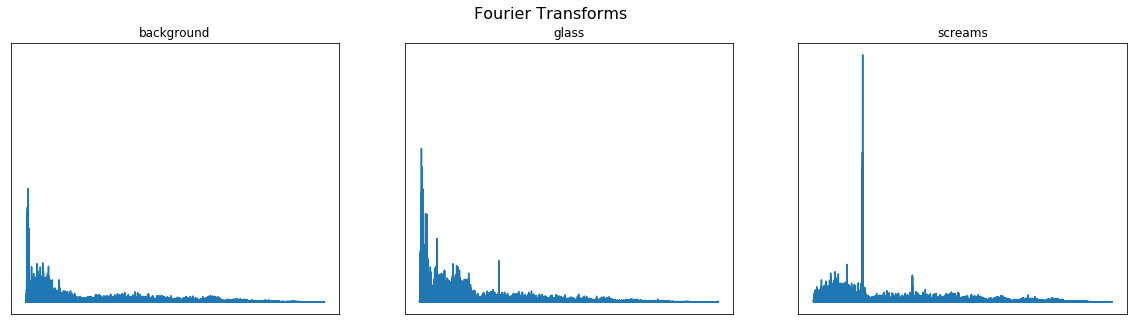

In [23]:
plot_fft(fft1)
plt.show()

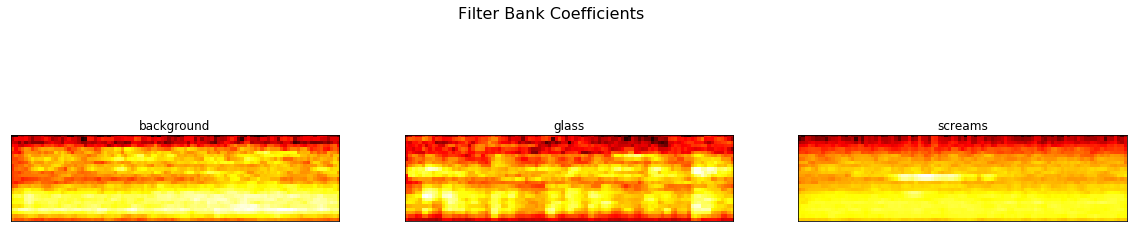

In [24]:
plot_fbank(fbank1)
plt.show()

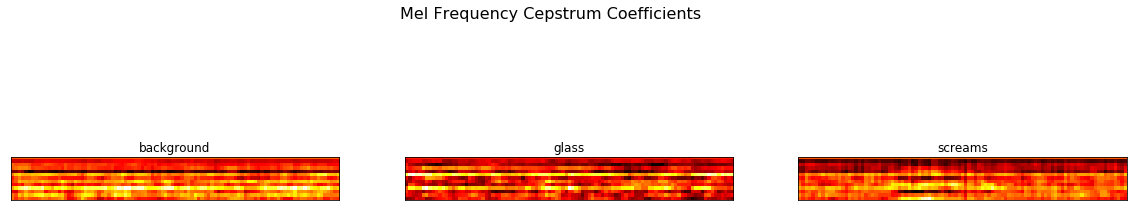

In [25]:
plot_mfccs(mfccs1)
plt.show()

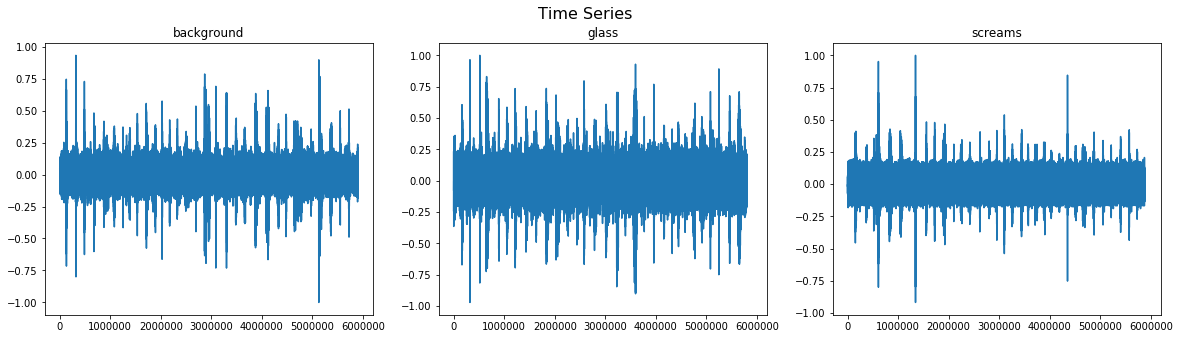

In [27]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

for c in classes: 
    wav_file = df[df.label==c].iloc[0,0]
    signal, rate = librosa.load('Dataset/Training/sounds/'+wav_file, sr=32000)
    mask = envelope(signal, rate, 0.0005)
    signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)

    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=800).T
    fbank[c] = bank
    mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=800).T
    mfccs[c] = mel
plot_signals(signals)
plt.show()

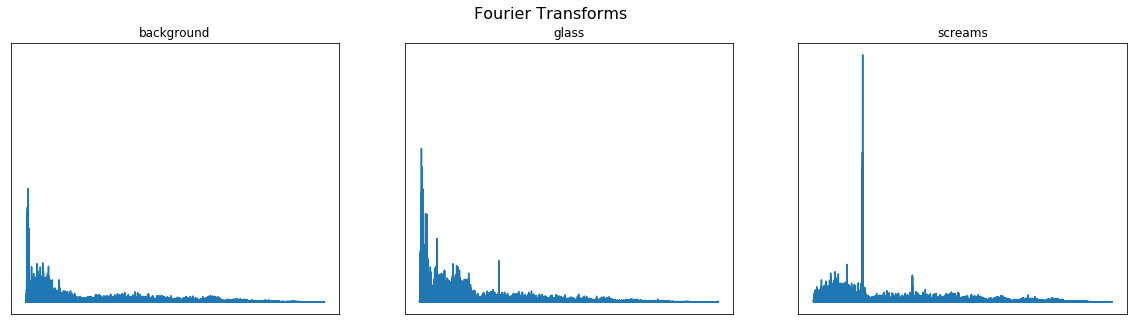

In [28]:
plot_fft(fft)
plt.show()

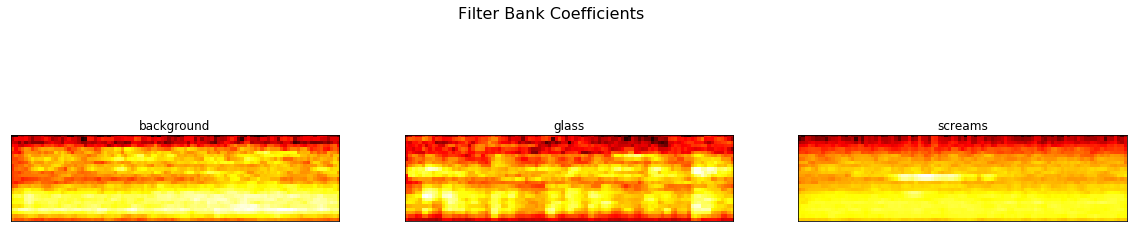

In [29]:
plot_fbank(fbank)
plt.show()

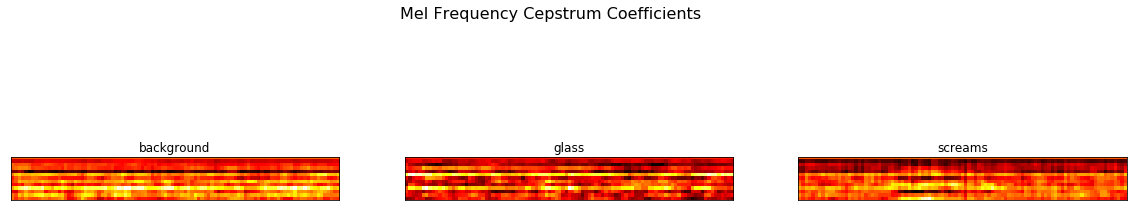

In [30]:
plot_mfccs(mfccs)
plt.show()

In [32]:
if len(os.listdir('smallclean')) == 0:
    for f in tqdm(df.fname):
        signal,rate = librosa.load('Dataset/Training/sounds/'+f, sr=16000)
        mask = envelope(signal, rate, 0.0005)
        wavfile.write(filename='smallclean/'+f, rate=rate, data=signal[mask])

100%|██████████| 150/150 [11:01<00:00,  4.39s/it]
